# Summarize Events in an AOI
Use the ArcGIS Python API to summarize events in an AOI. 

<img src="https://developers.arcgis.com/rest/analysis/api-reference/GUID-9B12DB3F-AA7B-41EB-87C6-D2DEC3D52DA9-web.png">

The Summarize Within task finds the point, line, or polygon features (or portions of these features) that are within the boundaries of polygons in another layer. For example:

Given a layer of watershed boundaries and a layer of land-use boundaries by land-use type, calculate total acreage of land-use type for each watershed.
Given a layer of parcels in a county and a layer of city boundaries, summarize the average value of vacant parcels within each city boundary.
Given a layer of counties and a layer of roads, summarize the total mileage of roads by road type within each county.


In [1]:
#Connect to a Web GIS Project
import arcgis
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from IPython.display import display
import getpass

In [2]:
Portal = "https://wdcintelportal.esri.com/portal"

In [3]:
Username = 'JohnFry'

In [4]:
password = getpass.getpass('Enter Password: ')

Enter Password: ········


In [5]:
# create a Web GIS object
gis = GIS(Portal, Username, password)

In [6]:
# create a map
map1 = gis.map()
map1.basemap = "topo"

In [7]:
map1

In [8]:
# open in Tripoli, Libya
location = geocode("33RYL81170964")[0]
map1.extent = location['extent']
map1.zoom = 5

<Item title:"Geodata DBO Oceans 10m" type:Feature Layer Collection owner:RBernstein_wdcintel>
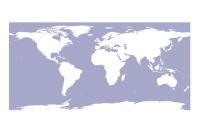

<Item title:"USA Territorial Sea Boundary" type:Feature Layer Collection owner:esri_livingatlas>
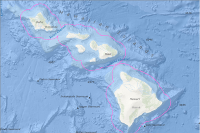

<Item title:"Dashboard_AOI - Outline" type:Feature Layer Collection owner:DAttaway_wdcintel>

<Item title:"Libya AOI" type:Feature Layer Collection owner:JohnFry>
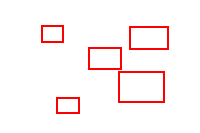

<Item title:"Terrorism Events" type:Feature Layer Collection owner:RBernstein_wdcintel>

<Item title:"Libya_Control_Areas_6July2017" type:Feature Layer Collection owner:DAttaway_wdcintel>

In [9]:
# search for service
Events = gis.content.search("Libya" or "Events", "feature service", max_items=6)
for item in Events:
    display(item)

In [10]:
AOI = Events[3]
Intel = Events[4]

In [11]:
# add to map
map1.add_layer(AOI)

In [12]:
map1.add_layer(Intel)

# Summarize Within
The SummarizeWithin task helps you to summarize and find statistics on the point, line, or polygon features (or portions of these features) that are within the boundaries of polygons in another layer. For example:Given a layer of watershed boundaries and a layer of land-use boundaries by land-use type, calculate total acreage of land-use type for each watershed.Given a layer of parcels in a county and a layer of city boundaries, summarize the average value of vacant parcels within each city boundary.Given a layer of counties and a layer of roads, summarize the total mileage of roads by road type within each county.

In [13]:
arcgis.summarize_within(sum_within_layer=AOI,summary_layer=Intel,output_name="SummaryOfEventsInLibyaAOI")

<Item title:"SummaryOfEventsInLibyaAOI" type:Feature Layer Collection owner:JohnFry>

In [14]:
SummarizedEvents = gis.content.search("SummaryOfEventsInLibyaAOI", "Feature Layer")[0]
# load the data in a process map
map2 = gis.map()
map2.basemap = "topo"
map2.add_layer(SummarizedEvents)
location = geocode("33RYL81170964")[0]
map2.extent = location['extent']

In [15]:
map2

In [16]:
map2.zoom = 5